In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# N точек, K классов, D мерное пространство 

In [13]:
def devil(N, D=2, K=3):
  N = 100
  D = 2
  K = 3
  X = np.zeros((N*K, D))
  y = np.zeros(N*K, dtype='uint8')

  for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.random(N) * 0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
  return X, y

In [14]:
X, y = devil(300)

## Добавление шума

In [15]:
X[:, 0] += np.random.normal(loc=0, scale=0.15, size=300)
X[:, 1] += np.random.normal(loc=0, scale=0.15, size=300)

In [33]:
from matplotlib.colors import ListedColormap
cmap_light =  ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
x_min, x_max = (-1, 1)
y_min, y_max = (-1, 1)

h = 0.05

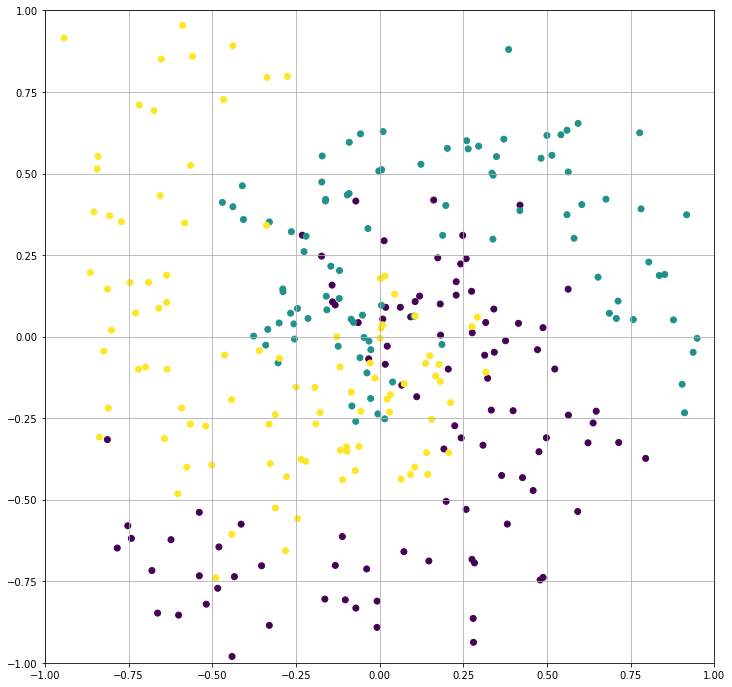

In [20]:
plt.figure(figsize=(12, 12))
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))

plt.grid(True)

plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.6)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [25]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [28]:
print(f"Процент правильно угаданных ответов на обучающем множестве:{accuracy_score(y_train, y_train_pred)}")
print(f"Процент правильно угаданных ответов на тестовом множестве:{accuracy_score(y_test, y_test_pred)}")

Процент правильно угаданных ответов на обучающем множестве:0.85
Процент правильно угаданных ответов на тестовом множестве:0.775


# Визуализация

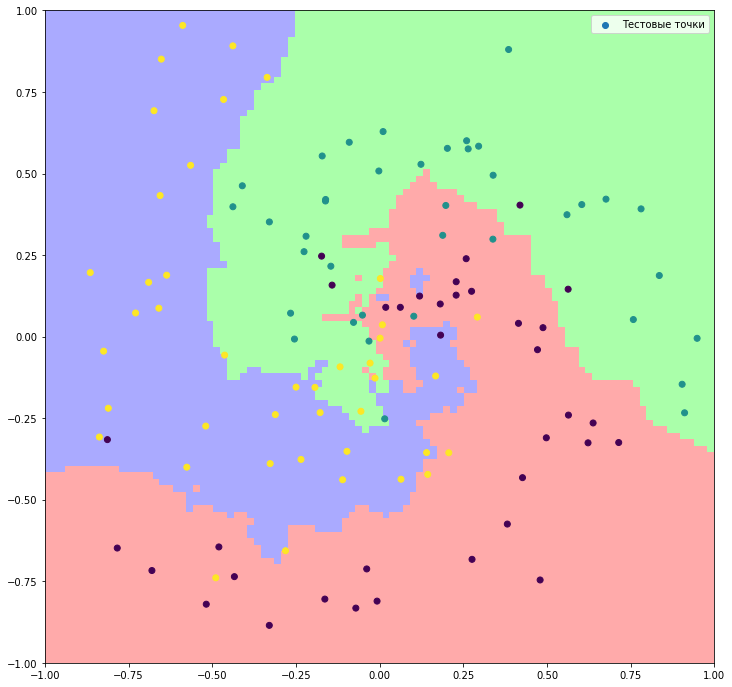

In [35]:
plt.figure(figsize=(12,12))
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Тeстовые точки')

plt.legend()

plt.show()

# Случай одного соседа

In [36]:
model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [37]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [38]:
print(f"Процент правильно угаданных ответов на обучающем множестве:{accuracy_score(y_train, y_train_pred)}")
print(f"Процент правильно угаданных ответов на тестовом множестве:{accuracy_score(y_test, y_test_pred)}")

Процент правильно угаданных ответов на обучающем множестве:1.0
Процент правильно угаданных ответов на тестовом множестве:0.7583333333333333


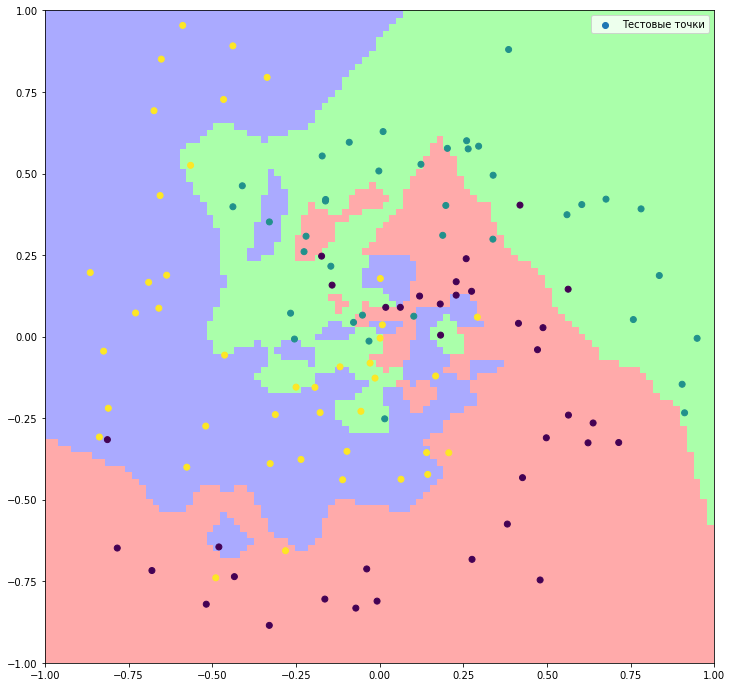

In [39]:
plt.figure(figsize=(12,12))
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Тeстовые точки')

plt.legend()

plt.show()